Generation is >0, Fitness = -28.000
Generation is >1, Fitness = -30.000
Generation is >2, Fitness = -37.000
Generation is >3, Fitness = -38.000
Generation is >4, Fitness = -40.000
Generation is >5, Fitness = -39.000
Generation is >6, Fitness = -39.000
Generation is >7, Fitness = -40.000
Generation is >8, Fitness = -44.000
Generation is >9, Fitness = -44.000
Generation is >10, Fitness = -44.000
Generation is >11, Fitness = -48.000
Generation is >12, Fitness = -43.000
Generation is >13, Fitness = -48.000
Generation is >14, Fitness = -44.000
Generation is >15, Fitness = -49.000
Generation is >16, Fitness = -50.000
Generation is >17, Fitness = -48.000
Generation is >18, Fitness = -49.000
Generation is >19, Fitness = -49.000
Generation is >20, Fitness = -50.000
Generation is >21, Fitness = -48.000
Generation is >22, Fitness = -47.000
Generation is >23, Fitness = -49.000
Generation is >24, Fitness = -50.000
Generation is >25, Fitness = -50.000
Generation is >26, Fitness = -50.000
Generation 

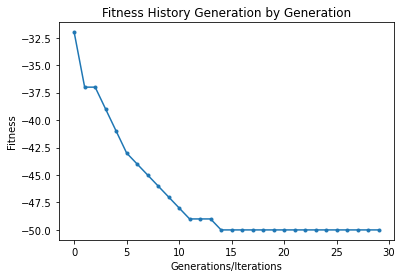

In [2]:
#Question#01
#This is genetic algorithm code for one-max optimization,
#GA generates a string of length 50 in whcih all values are 1.
#The best solution [ 1,1,1,1..............1] i.e. 50 1s.
# For example, a bitstring with a length of 20 bits will have a score of 20 for a string of all 1s.
from numpy.random import randint
from numpy.random import rand
import random
from matplotlib import pyplot
def onemax(x):
    return -sum(x)
def selection(pop, scores):
    k=10
    candidates = random.sample(range(len(pop)), k)
    winner = min(candidates, key=lambda x: scores[x])
    return pop[winner]
def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy()
    if rand() < r_cross:
        pt = randint(1, len(p1)-2)
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            bitstring[i] = 1 - bitstring[i]
def genetic_algorithm(values,objective, chromosome_size, n_iter, n_pop, r_cross, r_mut):
    pop = [randint(0, 2, chromosome_size).tolist() for _ in range(n_pop)]
    best, best_eval = 0, objective(pop[0])
    for gen in range(n_iter):
        scores = [objective(c) for c in pop]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
        children = list()
        for i in range(0, n_pop, 2):
            parent1 = selection(pop, scores)
            parent2 = selection(pop, scores)
            p1, p2 = parent1, parent2
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
        pop = children
        values.append(best_eval)
        print("Generation is >%d, Fitness = %.3f" % (gen, scores[i]))
    return [best, best_eval,values]
n_iter = 30
chromosome_size = 50
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / float(chromosome_size)
values=[]
best, score,values = genetic_algorithm(values,onemax, chromosome_size, n_iter, n_pop, r_cross, r_mut)
print('f(%s) = %f' % (best, score))
pyplot.plot(values, '.-')
pyplot.title("Fitness History Generation by Generation")
pyplot.xlabel('Generations/Iterations')
pyplot.ylabel('Fitness')
pyplot.show()

>0, new best f([-0.49072265625, 1.696624755859375]) = 3.119344
>0, new best f([0.30670166015625, -1.41357421875]) = 2.092258
>0, new best f([-1.26678466796875, -0.003814697265625]) = 1.604758
>0, new best f([0.644683837890625, -0.019989013671875]) = 0.416017
>1, new best f([0.063629150390625, -0.001373291015625]) = 0.004051
>1, new best f([0.019683837890625, -0.0244140625]) = 0.000983
>2, new best f([0.019683837890625, -0.023956298828125]) = 0.000961
>2, new best f([-0.010223388671875, -0.003814697265625]) = 0.000119
>4, new best f([-0.010833740234375, -0.000152587890625]) = 0.000117
>5, new best f([-0.010223388671875, -0.001068115234375]) = 0.000106
>5, new best f([0.009918212890625, -0.000152587890625]) = 0.000098
>5, new best f([0.000152587890625, -0.000457763671875]) = 0.000000
>7, new best f([0.000152587890625, -0.000152587890625]) = 0.000000
>9, new best f([0.0, -0.000152587890625]) = 0.000000


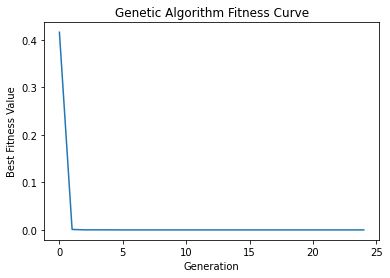

Done!
f([0.0, -0.000152587890625]) = 0.000000


In [1]:
#Question#02
#This is genetic algorithm code for function optimization,
# For example, we can define the x^2 minimization function
# that takes input variables and has an optima at  f(0, 0) = 0.0.

from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import random
def objective(x):
	return x[0]**2.0 + x[1]**2.0
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		start, end = i * n_bits, (i * n_bits) + n_bits
		substring = bitstring[start:end]
		chars = ''.join([str(s) for s in substring])
		integer = int(chars, 2)
		value = bounds[i][0] + (integer / largest) * (bounds[i][1] - bounds[i][0])
		decoded.append(value)
	return decoded
def selection(pop, scores, k=10):
	candidates = random.sample(range(len(pop)), k)
	winner = min(candidates, key=lambda x: scores[x])
	return pop[winner]
def crossover(p1, p2, r_cross):
	c1, c2 = p1.copy(), p2.copy()
	if rand() < r_cross:
		pt = randint(1, len(p1) - 2)
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		if rand() < r_mut:
			bitstring[i] = 1 - bitstring[i]
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	pop = [randint(0, 2, n_bits * len(bounds)).tolist() for _ in range(n_pop)]
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	gen_numbers = []
	best_fitness_values = []
	for gen in range(n_iter):
		decoded = [decode(bounds, n_bits, p) for p in pop]
		scores = [objective(d) for d in decoded]
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %f" % (gen, decoded[i], scores[i]))
		gen_numbers.append(gen)
		best_fitness_values.append(best_eval)
		children = list()
		for i in range(0, n_pop, 2):
			parent1 = selection(pop, scores)
			parent2 = selection(pop, scores)
			p1, p2 = parent1, parent2
			for c in crossover(p1, p2, r_cross):
				mutation(c, r_mut)
				children.append(c)
		pop = children

	plt.figure()
	plt.plot(gen_numbers, best_fitness_values)
	plt.xlabel('Generation')
	plt.ylabel('Best Fitness Value')
	plt.title('Genetic Algorithm Fitness Curve')
	plt.show()

	return [best, best_eval]

bounds = [[-5.0, 5.0], [-5.0, 5.0]]
n_iter = 25
n_bits = 16
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / (float(n_bits) * len(bounds))
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))
